## 📚 Import the library

In [1]:
import pandas as pd

## 🔄📊 Load dataset

In [2]:
df = pd.read_csv("Mall_Customers.csv")

## 📊⚙️ Show first few rows

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## 🔍 EDA – Exploratory Data Analysis

### ✔️ Check data info

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


### ❓ Check for missing values

In [5]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

### 📈 Summary statistics

In [6]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


## 👁️ Visualize the Data

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns 

### 📊 Age distribution

<Axes: xlabel='Age', ylabel='Count'>

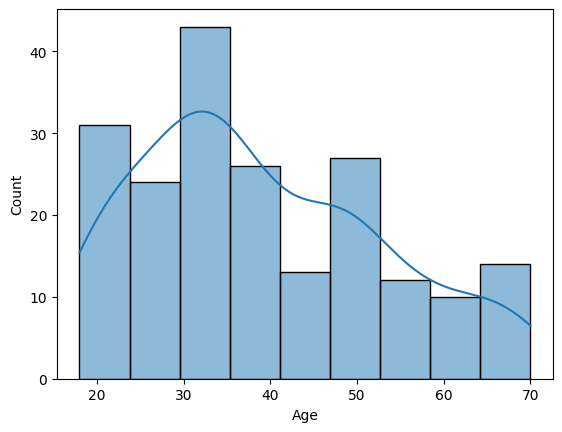

In [8]:
sns.histplot(df['Age'], kde=True)

### 🤜🤛 Spending Vs Income

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

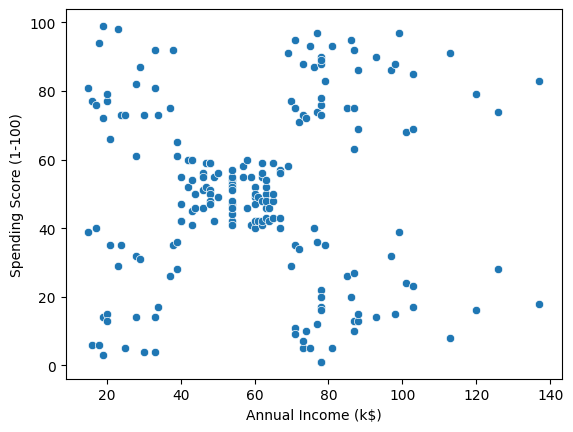

In [9]:
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)')

## 🧩 Select Features for Clustering

In [10]:
# For Clustering We'll use:
# 1. Age
# 2. Annual Income (k$)
# 3. Spending Score (1-100)

In [11]:
X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

## ➡️ Normalize the Data (Scaling)

In [12]:
import StandardScaler

ModuleNotFoundError: No module named 'StandardScaler'

In [ ]:
!pip install scikit-learn

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_Scaled = scaler.fit_transform(X)

## 🔗 Apply KMeans Clustering

In [ ]:
from sklearn.cluster import KMeans 

# Create KMeans model
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X_Scaled)

# Add the cluster labels to the original dataframe
df['Cluster'] = kmeans.labels_

In [ ]:
# Assuming you have your scaled data and KMeans model like this:
kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_Scaled)


In [ ]:
from sklearn.cluster import KMeans

# 1. Fit KMeans on scaled data and get cluster assignments
kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_Scaled)  # <-- Step 2: assign clusters here

# 2. Now you can analyze the clusters
print(df.groupby('Cluster').mean(numeric_only=True))
print(df['Cluster'].value_counts())

# 3. Optionally, map cluster numbers to descriptive names
cluster_labels = {
    0: 'VIP Customers',
    1: 'Budget Group',
    2: 'Growth Opportunity',
    3: 'Luxury Cautious'
}
df['Cluster Label'] = df['Cluster'].map(cluster_labels)



## 📂 Visualize the Clusters

In [ ]:
# Plot clusters by income and spending
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', palette='Set1')

## 🧮 Interpret the Segments

### 1. Group the data by clusters

In [ ]:
df.groupby('Cluster').mean(numeric_only = True)

#This gives you the average Age, Income, and Spending Score for each cluster.

### 2. See how many customers are in each cluster

In [ ]:
df['Cluster'].value_counts()

# This tells you if any group is much larger or smaller than others.

### 3. Visualize Clusters -- in immaculate way!!

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
plt.figure(figsize =(8,6))
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', palette='Set2')
plt.title('Customer Segment by Income and Spending')
plt.show()

# This helps you see the shape of your clusters visually.

### 4. Create a cluster profile table

In [ ]:
cluster_profiles = df.groupby('Cluster').agg({
    'Age': ['mean', 'min', 'max'],
    'Annual Income (k$)': ['mean', 'min', 'max'],
    'Spending Score (1-100)': ['mean','min', 'max'],
    'CustomerID': 'count'
}).round(2)
cluster_profiles

# This shows:
# Age range
# Income range
# Spending patterns
# Number of customers in each cluster

## ✨ Naming the Segments: Adding Business Context to Clusters 📊

In [ ]:
# Example: Rename clusters for clarity
cluster_labels = {
    0: 'VIP Customers',
    1: 'Budget Group',
    2: 'Growth Opportunity',
    3: 'Luxury Cautious'
}
df['Cluster Label'] = df['Cluster'].map(cluster_labels)


## Save Processed Data with Cluster Labels 🗂️💾

In [ ]:
# Map cluster numbers to descriptive labels
cluster_labels = {
    0: 'VIP Customers',
    1: 'Budget Group',
    2: 'Growth Opportunity',
    3: 'Luxury Cautious'
}
df['Cluster Label'] = df['Cluster'].map(cluster_labels)

# Save the final DataFrame to CSV for dashboard use
df.to_csv('customer_segments.csv', index=False)


## 🌟 Mapping Customer Segments: Income Meets Spending 💰

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', 
                hue='Cluster Label', palette='Set2', s=100, alpha=0.7)
plt.title('Customer Segments by Income and Spending Score')
plt.legend(title='Customer Segment')
plt.show()


## 📋 Comprehensive Cluster Profiles: Summary Statistics at a Glance

In [ ]:
cluster_profiles = df.groupby('Cluster Label').agg({
    'Age': ['mean', 'min', 'max'],
    'Annual Income (k$)': ['mean', 'min', 'max'],
    'Spending Score (1-100)': ['mean', 'min', 'max'],
    'CustomerID': 'count'
}).round(2)

print(cluster_profiles)


## 🧠 Cluster Insights Summary

### Cluster 0: Budget Conscious
##### Older customers (~ 54 yrs), moderate income (~$48k), low spenders. Focus on discounts and value deals.

### Cluster 1: Premium Customers
##### Younger adults (~ 33 yrs), high income (~$86k), high spenders. Target with premium offers and loyalty rewards.

### Cluster 2: Young Casual Shoppers
##### Young (~ 25 yrs), low income (~$40k), moderate spenders. Engage with trendy, affordable products and social media campaigns.

### Cluster 3: Cautious High-Income
##### Middle-aged (~ 39 yrs), high income (~$86.5k), low spenders. Build trust, offer incentives to encourage purchases.

## 🎯 Marketing Recommendations

| **Cluster**                  | **Profile Summary**                        | **Marketing Recommendations**                                         |
|------------------------------|--------------------------------------------|----------------------------------------------------------------------|
| **Cluster 0: Budget Conscious**  | Older, moderate income, low spenders          | - Discounts, bundles, seasonal sales<br>- Emphasize value-for-money<br>- Email & SMS exclusive offers |
| **Cluster 1: Premium Customers** | Younger, high income, high spenders           | - VIP memberships & loyalty programs<br>- Personalized premium marketing<br>- Exclusive events/invitations |
| **Cluster 2: Young Casual Shoppers** | Young, low income, moderate spenders          | - Social media & influencer campaigns<br>- Trendy, affordable items<br>- Mobile ads & gamified offers |
| **Cluster 3: Cautious High-Income** | Middle-aged, high income, low spenders         | - Build trust with great service<br>- Trial/demo offers<br>- Cashback & flexible payment plans |
